## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/CHGG.csv')
df.head()

,Date,Close
0,7/2/2018,28.410000
1,7/3/2018,28.540001
2,7/5/2018,28.370001
3,7/6/2018,28.760000
4,7/9/2018,28.950001


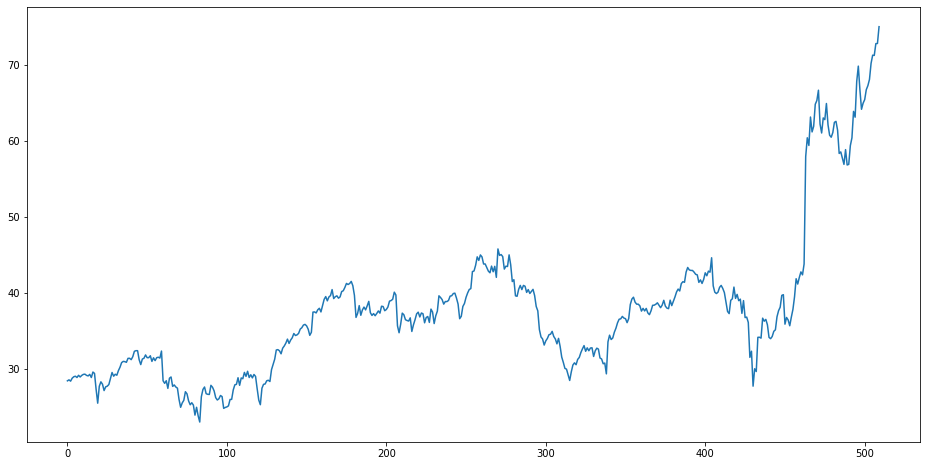

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,28.410000
1,2018-07-03,28.540001
2,2018-07-05,28.370001
3,2018-07-06,28.760000
4,2018-07-09,28.950001


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.2326
Epoch 2/5
8/8 - 1s - loss: 0.0280
Epoch 3/5
8/8 - 1s - loss: 0.0157
Epoch 4/5
8/8 - 1s - loss: 0.0129
Epoch 5/5
8/8 - 1s - loss: 0.0103


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0104
Loss: 0.010384639725089073


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[34.913094],
       [30.572542],
       [29.94867 ],
       [30.038565],
       [27.413317],
       [29.659262],
       [35.177746],
       [38.472145],
       [36.25611 ],
       [28.008648],
       [31.388708],
       [36.80243 ],
       [36.704903],
       [37.682507],
       [33.70953 ],
       [35.185966],
       [31.422276],
       [37.183327],
       [36.81167 ],
       [36.837482],
       [30.797306],
       [37.41329 ],
       [37.641663],
       [41.5825  ],
       [31.6848  ],
       [37.01454 ],
       [38.758446],
       [28.193224],
       [33.109383],
       [34.752014],
       [38.203297],
       [31.854744],
       [33.317673],
       [32.313553],
       [35.24635 ],
       [36.731083],
       [27.898813],
       [28.72231 ],
       [39.527607],
       [39.520874],
       [27.888971],
       [27.456312],
       [37.838192],
       [36.850166],
       [37.160793],
       [39.197247],
       [40.798527],
       [30.991064],
       [34.310364],
       [31.983442],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,34.913094
1,30.572542
2,29.948669
3,30.038565
4,27.413317
...,...
73,27.819254
74,27.818586
75,32.096710
76,29.820009


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[36.669998],
       [27.450001],
       [29.25    ],
       [25.889999],
       [27.280001],
       [27.950001],
       [34.400002],
       [39.299999],
       [34.919998],
       [27.950001],
       [32.709999],
       [37.240002],
       [38.77    ],
       [38.349998],
       [36.049999],
       [36.59    ],
       [28.92    ],
       [36.700001],
       [36.049999],
       [37.849998],
       [32.360001],
       [39.450001],
       [38.23    ],
       [43.509998],
       [33.      ],
       [39.599998],
       [40.27    ],
       [26.200001],
       [31.290001],
       [30.84    ],
       [39.48    ],
       [27.42    ],
       [34.639999],
       [30.530001],
       [34.799999],
       [39.130001],
       [27.889999],
       [25.26    ],
       [44.73    ],
       [40.93    ],
       [25.959999],
       [26.32    ],
       [38.990002],
       [34.48    ],
       [38.5     ],
       [43.619999],
       [40.970001],
       [27.870001],
       [36.57    ],
       [33.380001],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,34.913094,36.669998
1,30.572542,27.450001
2,29.948669,29.250000
3,30.038565,25.889999
4,27.413317,27.280001
...,...,...
73,27.819254,27.820000
74,27.818586,23.799999
75,32.096710,32.130001
76,29.820009,28.799999


In [16]:
lstm_model.save("../models/CHGG_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[37.779594],
       [37.821022],
       [37.851162],
       [37.882275],
       [37.92996 ],
       [37.967983],
       [37.98983 ],
       [37.992626],
       [38.016693],
       [38.03578 ],
       [38.071766],
       [38.122837],
       [38.209217],
       [38.32765 ],
       [38.456184],
       [38.613026],
       [38.78604 ],
       [38.972446],
       [39.191364],
       [39.438366],
       [39.69544 ],
       [39.937084],
       [40.16286 ],
       [40.361214],
       [40.52545 ],
       [40.660847],
       [40.740154],
       [40.78673 ],
       [40.795506],
       [40.79839 ],
       [40.812893],
       [40.832012],
       [40.869495],
       [40.90584 ],
       [41.00426 ],
       [41.031273],
       [40.99525 ],
       [40.889706],
       [40.766872],
       [40.652534],
       [40.551033],
       [40.456093],
       [40.339172],
       [40.18716 ],
       [39.984432],
       [39.733715],
       [39.522213],
       [39.349915],
       [39.260586],
       [39.17462 ],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,38.680000
371,2019-12-20,38.349998
372,2019-12-23,38.040001
373,2019-12-24,38.380001
374,2019-12-26,39.009998
...,...,...
505,2020-07-06,71.269997
506,2020-07-07,71.239998
507,2020-07-08,72.790001
508,2020-07-09,72.809998


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,38.680000,37.779594
371,2019-12-20,38.349998,37.821022
372,2019-12-23,38.040001,37.851162
373,2019-12-24,38.380001,37.882275
374,2019-12-26,39.009998,37.929958
...,...,...,...
505,2020-07-06,71.269997,53.828190
506,2020-07-07,71.239998,54.079716
507,2020-07-08,72.790001,54.342968
508,2020-07-09,72.809998,54.599998


In [23]:
forecast_data.to_csv("../data/predictions/CHGG.csv")

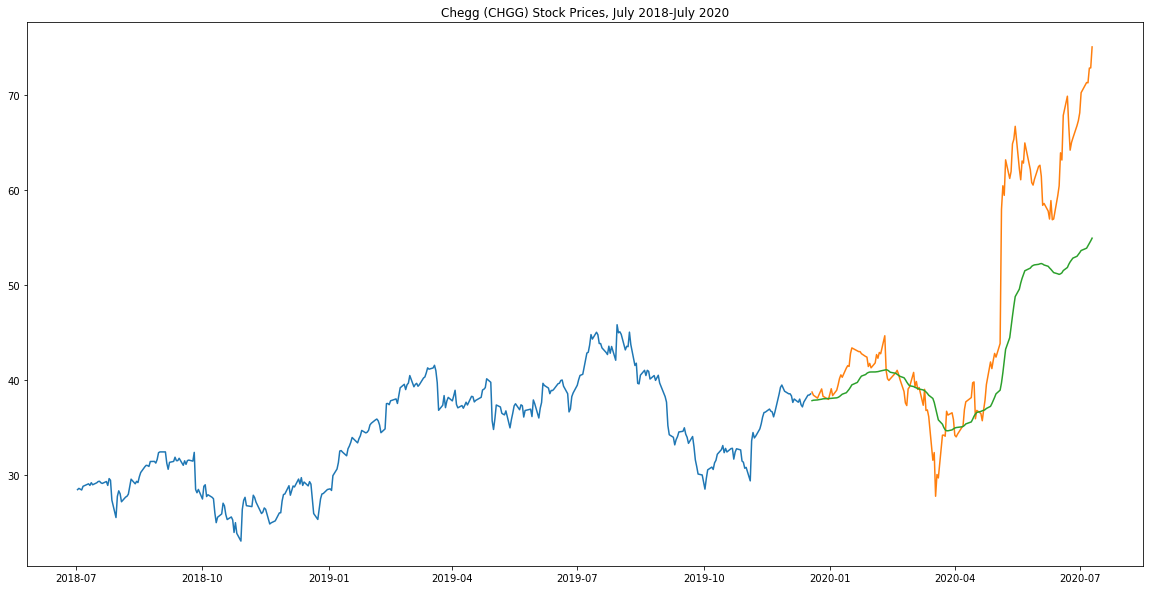

In [23]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Chegg (CHGG) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/CHGG.png")